In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pytesseract
import cv2
import re

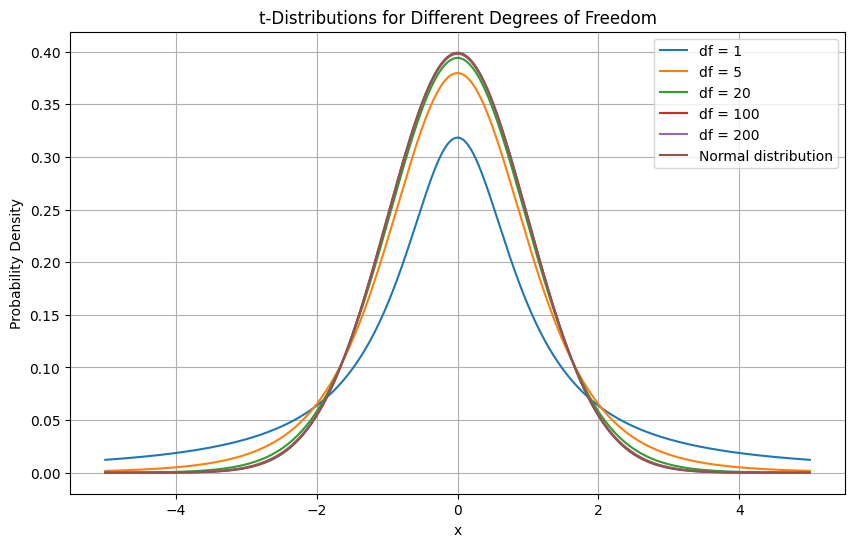

In [4]:
# Define degrees of freedom
df_values = [1, 5, 20,100,200]

# Define x range
x = np.linspace(-5, 5, 1000)

# Plot t-distributions for different degrees of freedom
plt.figure(figsize=(10, 6))
for df in df_values:
    plt.plot(x, stats.t.pdf(x, df), label=f'df = {df}')
plt.plot(x,stats.norm.pdf(x,loc=0,scale=1),label='Normal distribution')
plt.title('t-Distributions for Different Degrees of Freedom')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def calculate_t_score(sample_mean, population_mean, standard_deviation, sample_size):
    """Calculate the z-score for hypothesis testing."""
    return (sample_mean - population_mean) / (standard_deviation / (sample_size ** 0.5))

def perform_hypothesis_test(t_score, alpha,tail,df):
    """Perform the hypothesis test and plot the normal distribution."""
    # Calculate critical value (one-tailed test)
    if tail.lower() == 'upper':
        critical_value = stats.t.ppf(1 - alpha,df)
    elif tail.lower() == 'lower':
        critical_value = stats.t.ppf(alpha,df)

    # Print the z-score and critical value
    print("t-score:", t_score)
    print("Critical Value:", critical_value)

    # Perform hypothesis test
    if np.abs(t_score) >= np.abs(critical_value):
        print("Reject Null Hypothesis (H0)")
    else:
        print("Fail to Reject Null Hypothesis (H0)")

    # Plot the normal distribution
    x = np.linspace(-5, 5, 1000)
    y = stats.t.pdf(x,df)
    plt.plot(x, y)
    if tail.lower() == 'upper':
        plt.fill_between(x[x > critical_value], 0, stats.t.pdf(x[x > critical_value],df), color='red', alpha=0.5)
    elif tail.lower() == 'lower':
        plt.fill_between(x[x < critical_value], 0, stats.t.pdf(x[x < critical_value],df), color='red', alpha=0.5)
    plt.axvline(x=critical_value,linestyle='--',color='black',label='Critical value')
    plt.axvline(x=t_score,linestyle='--',color='green',label='test statistic')
    plt.axhline(y=0,linewidth=3,color='black')
    plt.text(critical_value + 0.1, 0.1, 'Critical Region', fontsize=10, color='red')
    plt.xlabel('t-score')
    plt.ylabel('Probability Density')
    plt.title('Student t-Distribution with Critical Region')
    plt.show()

In [6]:
def perform_two_tailed_hypothesis_test(alpha,t_score,df):
    # Generate x values for the plot
    x = np.linspace(-5, 5, 1000)

    # Calculate the critical values for a two-tailed test
    critical_value_left = stats.t.ppf(alpha / 2,df)
    critical_value_right = stats.t.ppf(1 - alpha / 2,df)

    # Print the z-score and critical value
    print("t-score:", t_score)
    print("Critical Value:", (critical_value_left,critical_value_right))

    if np.abs(t_score) > critical_value_right:
        print("Reject Null Hypothesis (H0)")
    else:
        print("Fail to Reject Null Hypothesis (H0)")


    # Plot the standard normal distribution
    plt.plot(x, stats.t.pdf(x,df), label='Student t-Distribution')

    # Shade the left critical region
    plt.fill_between(x[x < critical_value_left], 0, stats.t.pdf(x[x < critical_value_left],df), color='red', alpha=0.5)

    # Shade the right critical region
    plt.fill_between(x[x > critical_value_right], 0, stats.t.pdf(x[x > critical_value_right],df), color='red', alpha=0.5)

    # Plot vertical lines at the critical values
    plt.axvline(critical_value_left, color='red', linestyle='--', label='Critical Value')
    plt.axvline(critical_value_right, color='red', linestyle='--')
    plt.axvline(t_score, color='green', linestyle='--',label='t score')
    plt.axhline(y=0,linewidth=3,color='black')



    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Two-Tailed Hypothesis Test')
    plt.legend()

    # Show plot
    plt.show()

t-score: 2.23606797749979
Critical Value: 1.729132811521367
Reject Null Hypothesis (H0)


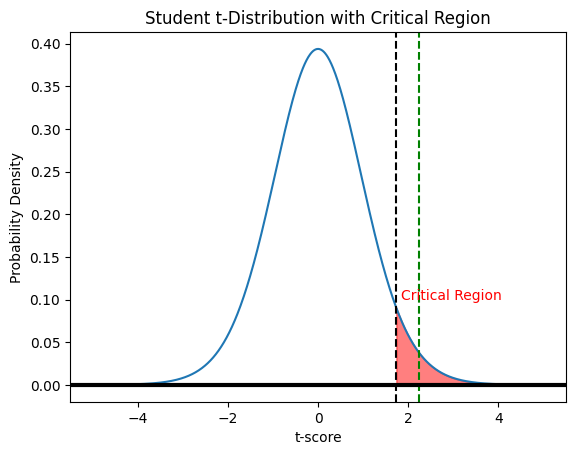

In [7]:
#Given
population_mean  = 305
sample_mean = 311
sample_std = 12
n=20
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 1

t-score: 2.1081851067789197
Critical Value: 1.8331129326536333
Reject Null Hypothesis (H0)


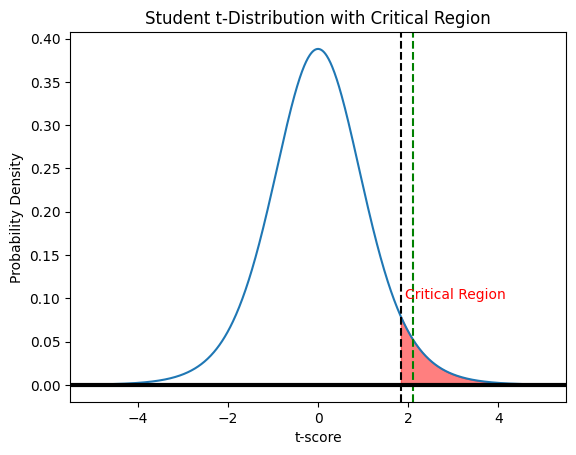

In [8]:
#Given
population_mean  = 10
sample_mean = 12
sample_std = 3
n=10
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 2

t-score: 4.04145188432738
Critical Value: (-3.1058065132211015, 3.105806513221101)
Reject Null Hypothesis (H0)


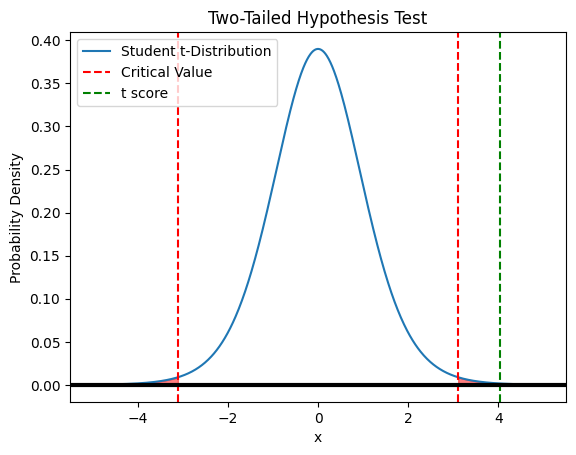

In [9]:
#Given
population_mean  = 400
sample_mean = 407
sample_std = 6
n=12
alpha = 0.01

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 3

t-score: 5.039526306789696
Critical Value: 1.7032884457221265
Reject Null Hypothesis (H0)


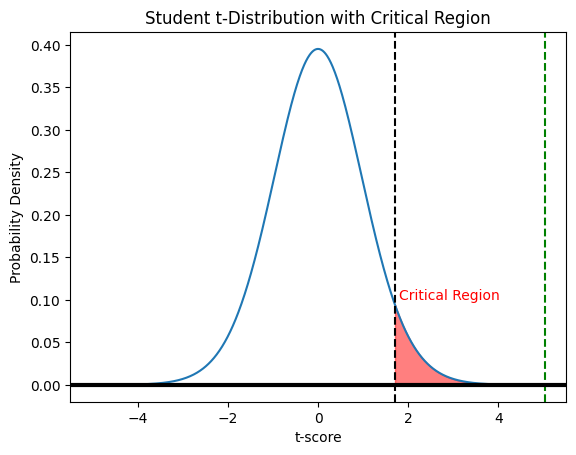

In [10]:
#Given
population_mean  = 40
sample_mean = 42
sample_std = 2.1
n=28
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 4

t-score: -3.08454263906029
Critical Value: -1.3194602391408925
Reject Null Hypothesis (H0)


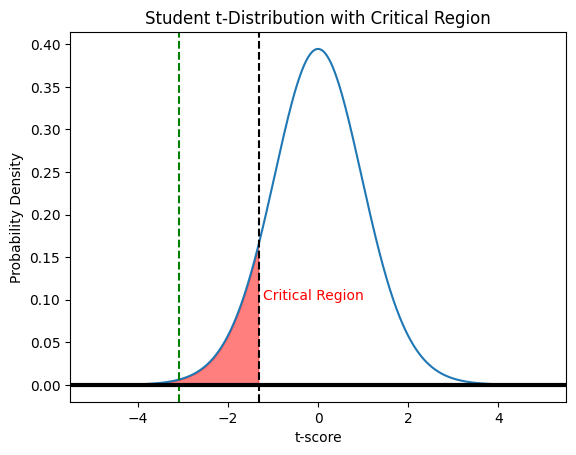

In [11]:
#Given
population_mean  = 42.3
sample_mean = 40.6
sample_std = 2.7
n=24
alpha = 0.1

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)


## Question 5

t-score: 3.676955262170047
Critical Value: 1.7396067260750672
Reject Null Hypothesis (H0)


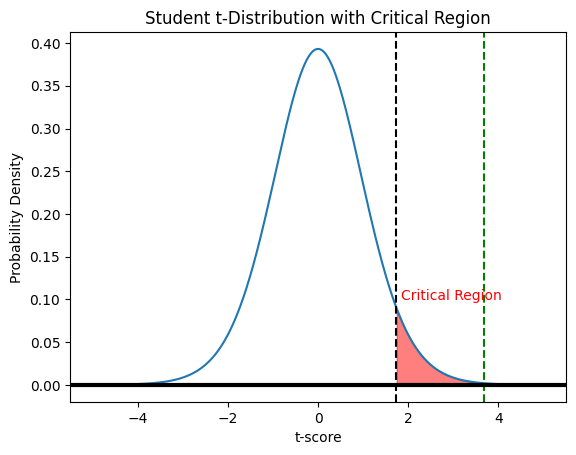

In [12]:
#Given
population_mean  = 22100
sample_mean = 23400
sample_std = 1500
n=18
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 6

t-score: 13.747727084867519
Critical Value: 1.7247182429207857
Reject Null Hypothesis (H0)


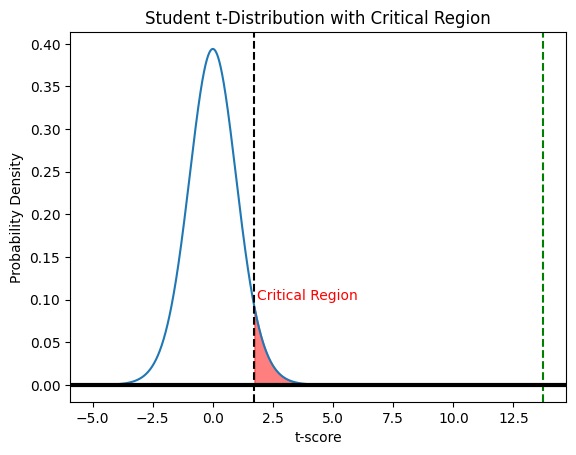

In [13]:
#Given
population_mean  = 15
sample_mean = 18
sample_std = 1
n=21
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


t-score: -2.494438257849286
Critical Value: -2.9979515668685286
Fail to Reject Null Hypothesis (H0)


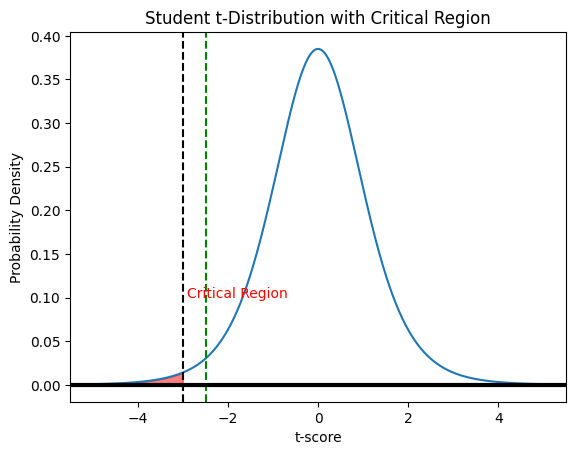

In [14]:
#Given
data = [9.2,8.7,8.9,8.6,8.8,8.5,8.7,9]

population_mean  = 9
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.01

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)


## Question 7

t-score: -1.8973665961010278
Critical Value: -3.7469473879811375
Fail to Reject Null Hypothesis (H0)


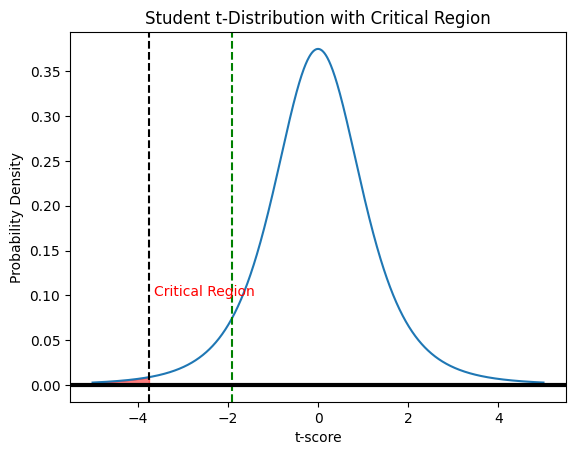

In [15]:
#Given
data = [18,15,12,19,21]

population_mean  = 20
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.01

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)


## Question 8

t-score: 4.719399037242696
Critical Value: (-2.57058183661474, 2.5705818366147395)
Reject Null Hypothesis (H0)


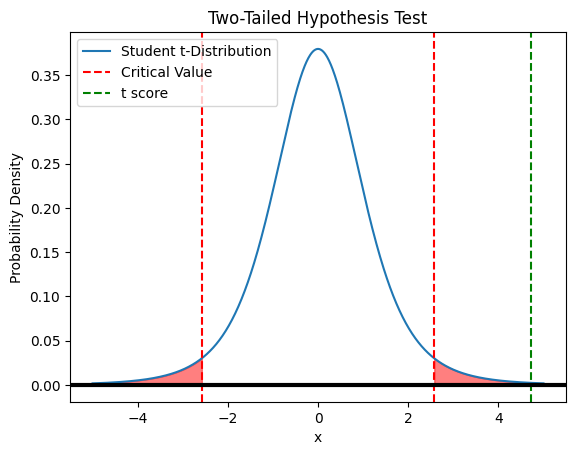

In [16]:
#Given
data = [118,105,112,119,105,111]

population_mean  = 100
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 9

t-score: 1.6776983682033013
Critical Value: 2.8214379233005493
Fail to Reject Null Hypothesis (H0)


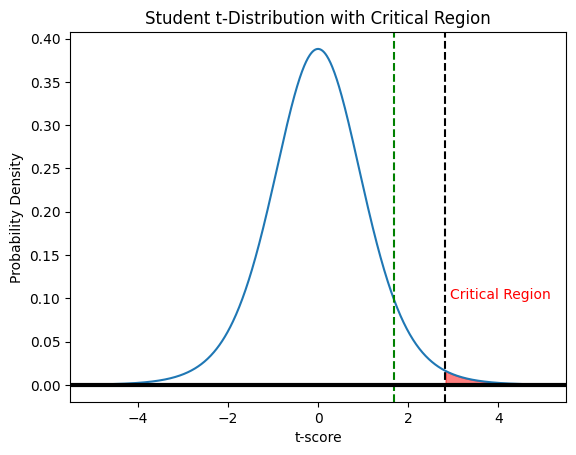

In [17]:
#Given
data = [4.41,4.37,4.33,4.35,4.3,4.39,4.36,4.38,4.4,4.39]

population_mean  = 4.35
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.01

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 10

t-score: 3.9791187373788452
Critical Value: 2.3060041350333704
Reject Null Hypothesis (H0)


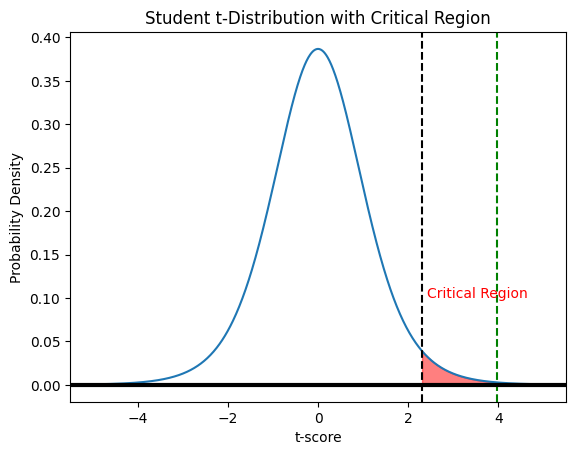

In [18]:
#Given
data = [2159,2170,2180,2179,2160,2167,2171,2181,2185]

population_mean  = 2160
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.025

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 11

t-score: 0.6463137929731515
Critical Value: 1.7958848187036691
Fail to Reject Null Hypothesis (H0)


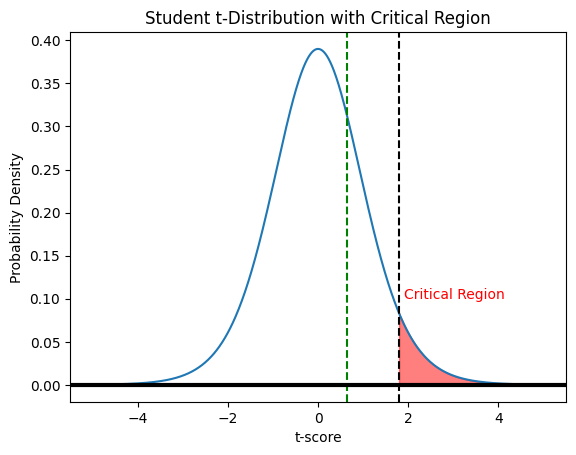

In [19]:
#Given
data = [4,4,3,2,6,8,7,1,9,3,1,6]

population_mean  = 4
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 12

t-score: 3.403474707089738
Critical Value: 1.7613101357748562
Reject Null Hypothesis (H0)


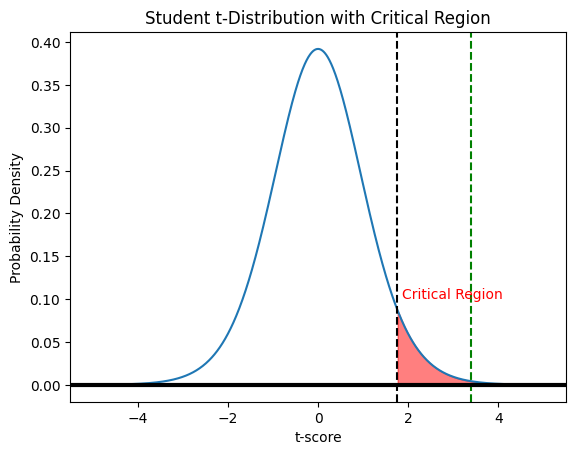

In [20]:
#Given
data = [53,57,50,55,58,54,60,52,59,62,60,60,51,59,56]

population_mean  = 53
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,df)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)

t-score: -2.8371974624607628
Critical Value: -1.7822875556491593
Reject Null Hypothesis (H0)


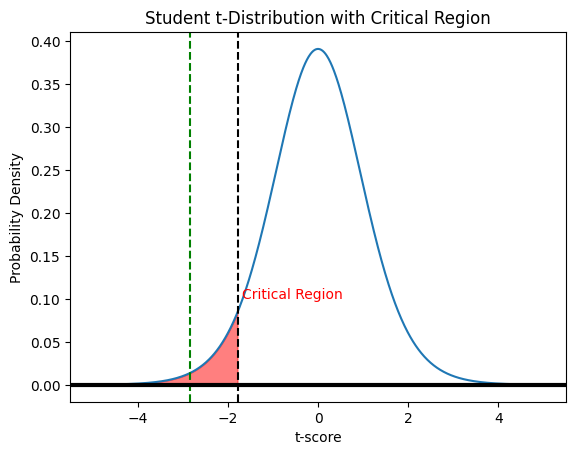

In [21]:
#Given
data1 = [5,8,7,6,9,7]
data2 = [8,10,7,11,9,12,14,9]

sample_mean1 = np.mean(data1)
sample_std1 = np.std(data1,ddof=1)
sample_mean2 = np.mean(data2)
sample_std2 = np.std(data2,ddof=1)

n1=len(data1)
n2=len(data2)
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)

## Question 13

t-score: -1.416428463593022
Critical Value: (-2.1199052992210112, 2.119905299221011)
Fail to Reject Null Hypothesis (H0)


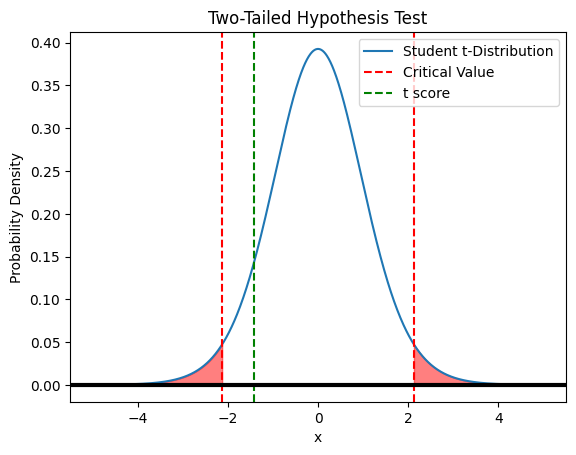

In [22]:
#Given

sample_mean1 = 23
sample_std1 = 4
sample_mean2 = 26
sample_std2 = 5

n1=10
n2=8
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 14

t-score: 1.6505632294338122
Critical Value: (-1.6972608943617384, 1.6972608943617378)
Fail to Reject Null Hypothesis (H0)


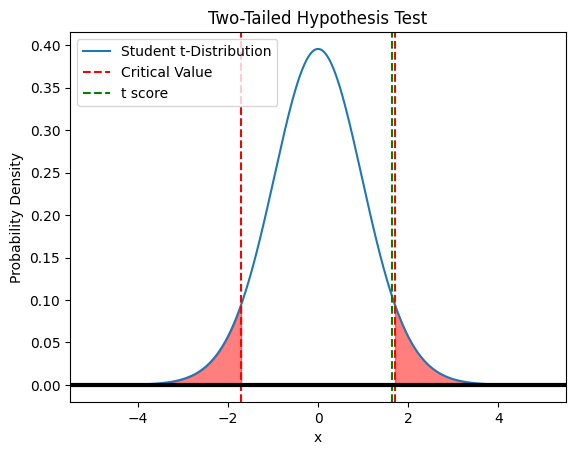

In [23]:
#Given

sample_mean1 = 350
sample_std1 = 12
sample_mean2 = 342
sample_std2 = 15

n1=15
n2=17
alpha = 0.1

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 15

t-score: -0.2343189674056622
Critical Value: -1.7613101357748564
Fail to Reject Null Hypothesis (H0)


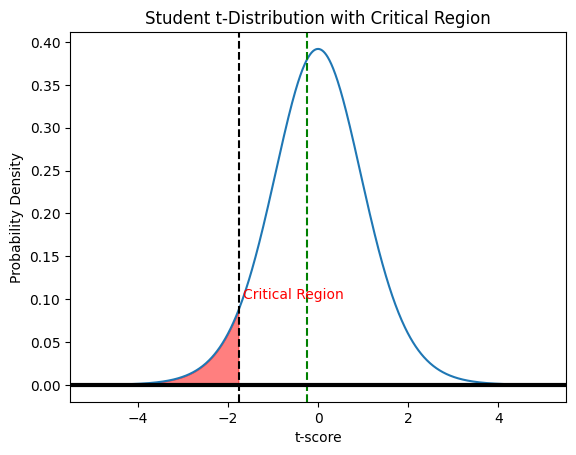

In [24]:
#Given
data1 = [72,69,98,66,85,76,79,80,77]
data2 = [81,67,90,78,81,80,76]

sample_mean1 = np.mean(data1)
sample_std1 = np.std(data1,ddof=1)
sample_mean2 = np.mean(data2)
sample_std2 = np.std(data2,ddof=1)

n1=len(data1)
n2=len(data2)
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)

## Question 16

t-score: -3.063089623779221
Critical Value: (-2.051830516480284, 2.0518305164802833)
Reject Null Hypothesis (H0)


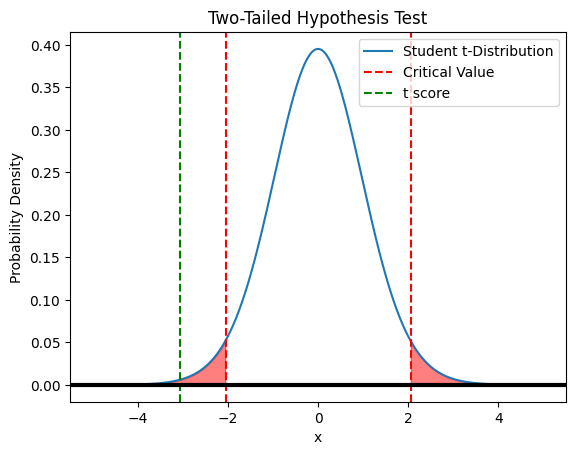

In [25]:
#Given

sample_mean1 = 300
sample_std1 = 20**0.5
sample_mean2 = 305
sample_std2 = 18**0.5

n1=16
n2=13
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 17

t-score: 1.324884579477084
Critical Value: 1.3006493318839214
Reject Null Hypothesis (H0)


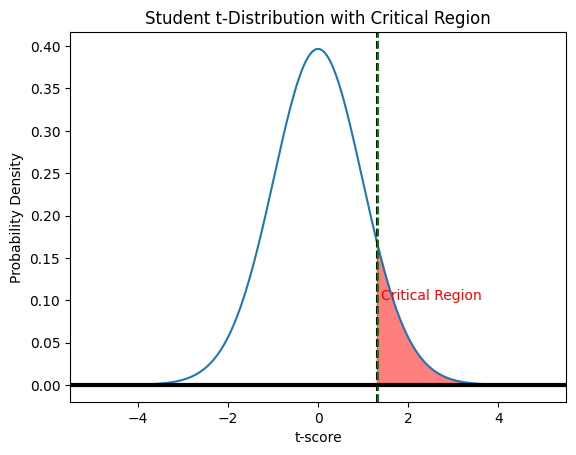

In [26]:
#Given

sample_mean1 = 89
sample_std1 = 4
sample_mean2 = 87
sample_std2 = 6

n1=22
n2=25
alpha = 0.1

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_hypothesis_test(t_score,alpha,'upper',df)

## Question 18

t-score: 0.13708230467069987
Critical Value: -1.7709333959867992
Fail to Reject Null Hypothesis (H0)


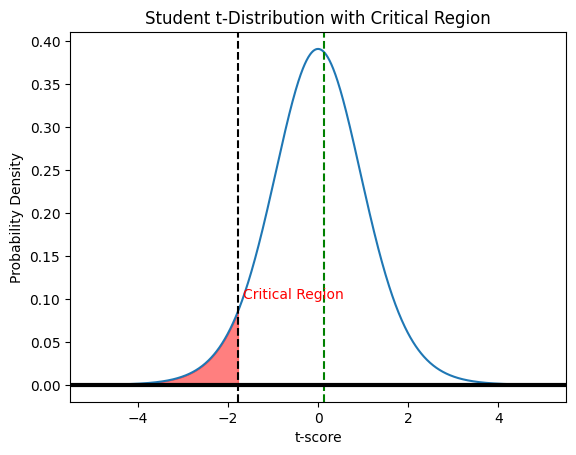

In [27]:
#Given
data1 = [55,70,68,67,70]
data2 = [64,65,68,75,70,70,63,66,65,49]

sample_mean1 = np.mean(data1)
sample_std1 = np.std(data1,ddof=1)
sample_mean2 = np.mean(data2)
sample_std2 = np.std(data2,ddof=1)

n1=len(data1)
n2=len(data2)
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)

t-score: -0.18181818181818182
Critical Value: (-2.306004135033371, 2.3060041350333704)
Fail to Reject Null Hypothesis (H0)


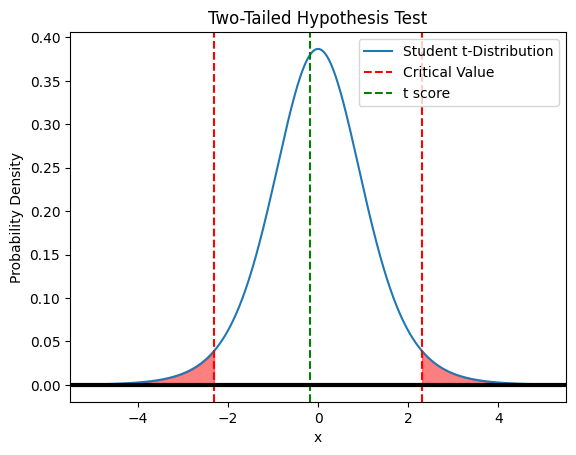

In [28]:
#Given
sol_A = [16,9,21,14,26,27,18,14,30]
sol_B = [18,7,26,11,26,22,19,20,28]
data = [i-j for i,j in zip(sol_A,sol_B)]

sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 19

t-score: 7.3484692283495345
Critical Value: (-3.1824463052842638, 3.182446305284263)
Reject Null Hypothesis (H0)


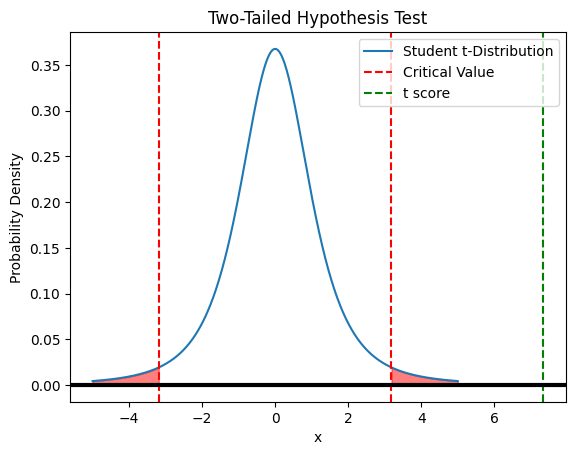

In [29]:
#Given
sol_A = [10,12,15,19]
sol_B = [8,9,12,15]
data = [i-j for i,j in zip(sol_A,sol_B)]

sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 20

t-score: 6.782329983125269
Critical Value: (-2.7764451051977996, 2.7764451051977987)
Reject Null Hypothesis (H0)


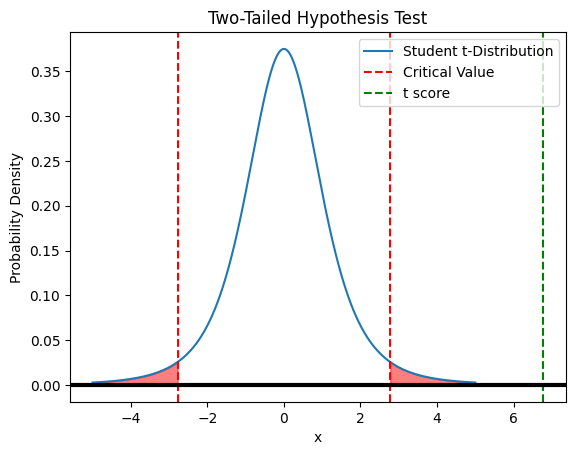

In [30]:
#Given
sol_A = [30,22,25,19,26]
sol_B = [26,19,20,15,19]
data = [i-j for i,j in zip(sol_A,sol_B)]

sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 21

In [31]:
path = 'C:\\Users\\kakut\\OneDrive\\Desktop\\ocr images\\'
image_file = f'{path}photo_2024-03-11_19-44-46.jpg'
img = cv2.imread(image_file)

### Graying

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(f"{path}\\temp\\index_gray.png", gray)

True

### Binary Thresh

In [33]:
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite(f"{path}\\temp\\index_thresh.png", thresh)

True

### Dilating

In [34]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
dilated = cv2.dilate(thresh, kernel, iterations=5)
cv2.imwrite(f"{path}\\temp\\index_dilated.png", dilated)

True

### Erosion

In [35]:
eroded = cv2.erode(dilated, kernel, iterations=1)
cv2.imwrite(f"{path}\\temp\\index_eroded.png", eroded)

True

In [36]:
cnts = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [37]:
results  = []
rois = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = img[y:y+h, x:x+w]
        rois.append(roi)
        cv2.rectangle(img, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_result = pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)
cv2.imwrite(f"{path}\\temp\\index_bbox_new.png", img)

True

In [38]:
roi1_text = pytesseract.image_to_string(rois[0])
roi2_text = pytesseract.image_to_string(rois[1],config='--psm 6 -l eng')
roi3_text = pytesseract.image_to_string(rois[2],config='--psm 6 -l eng')


#Strings to exclude from the extracted text
exclude_strings =("Name","Weight on","arrival","Weight one","year later")

# Combine text from both ROIs and filter out specified strings
col1 = [i for i in roi1_text.split("\n") if i.strip() and i not in exclude_strings]
col2 = [i for i in roi2_text.split("\n") if i.strip() and i not in exclude_strings]
col3 = [i for i in roi3_text.split("\n") if i.strip() and i not in exclude_strings]


In [39]:
pattern = re.compile(r'\d+')
df = pd.DataFrame({
                'Name':col1,
                'Weight in arrival':[int(match) for s in col2 for match in pattern.findall(s) if match],
                'Weight one year later':[int(match) for s in col3 for match in pattern.findall(s) if match]
                  })
df

,Name,Weight in arrival,Weight one year later
0,Nassar,124,142
1,O'Toole,157,157
2,Obie,98,96
3,Silverman,190,212
4,Kim,103,116
5,Gross,135,134
6,Farouk,149,150
7,Thatcher,176,184
8,Sambul,200,209
9,Onassis,180,180


t-score: 2.93110447430206
Critical Value: (-2.2281388519649385, 2.2281388519649385)
Reject Null Hypothesis (H0)


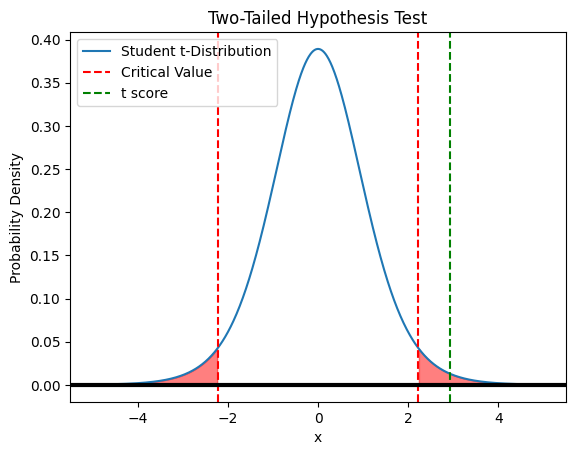

In [40]:
df['diff'] = df['Weight one year later'] - df['Weight in arrival']

data  = df['diff']
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 22

In [41]:
path = 'C:\\Users\\kakut\\OneDrive\\Desktop\\ocr images\\'
image_file = f'{path}q22.jpg'
img = cv2.imread(image_file)

### Graying

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(f"{path}\\temp\\index_gray.png", gray)

True

### Binary Thresholding

In [43]:
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite(f"{path}\\temp\\index_thresh.png", thresh)

True

### Dilating

In [44]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilated = cv2.dilate(thresh, kernel, iterations=5)
cv2.imwrite(f"{path}\\temp\\index_dilated.png", dilated)


True

### Erosion

In [45]:
eroded = cv2.erode(dilated, kernel, iterations=1)
cv2.imwrite(f"{path}\\temp\\index_eroded.png", eroded)


True

In [46]:
cnts = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
results  = []
rois = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = img[y:y+h, x:x+w]
        rois.append(roi)
        cv2.rectangle(img, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_result = pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)
cv2.imwrite(f"{path}\\temp\\index_bbox_new.png", img)

True

In [47]:
roi1_text = pytesseract.image_to_string(rois[0])
roi2_text = pytesseract.image_to_string(rois[1],config='--psm 6 -l eng')
roi3_text = pytesseract.image_to_string(rois[2],config='--psm 6 -l eng')
roi4_text = pytesseract.image_to_string(rois[3])
roi5_text = pytesseract.image_to_string(rois[4],config='--psm 6 -l eng')
#roi6_text = pytesseract.image_to_string(rois[5],config='--psm 6 -l eng')


#Strings to exclude from the extracted text
exclude_strings =("Salesperson","Before","After","Before After")

# Combine text from both ROIs and filter out specified strings
col1 = [i for i in roi1_text.split("\n") if i.strip() and i not in exclude_strings]
col2 = [i for i in roi2_text.split("\n") if i.strip() and i not in exclude_strings]
col3 = [i for i in roi3_text.split("\n") if i.strip() and i not in exclude_strings]
col4 = [i for i in roi4_text.split("\n") if i.strip() and i not in exclude_strings]
col5 = [i for i in roi5_text.split("\n") if i.strip() and i not in exclude_strings]
col5, col6 = zip(*(s.split() for s in col5))


In [48]:
pattern = re.compile(r'\d+')
df = pd.DataFrame({
                'Salesperson':col1+col4,
                'Before':[int(match) for s in col2 for match in pattern.findall(s) if match]+[int(match) for s in col5 for match in pattern.findall(s) if match],
                'After':[int(match) for s in col3 for match in pattern.findall(s) if match]+[int(match) for s in col6 for match in pattern.findall(s) if match]
                  })
#The following entry was read incorrectly by the OCR engine
df['After'].loc[10] = 525

C:\Users\kakut\AppData\Local\Temp\ipykernel_23888\3148309862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['After'].loc[10] = 525


In [49]:
df['Diff'] = df['After'] - df['Before']
df

,Salesperson,Before,After,Diff
0,Sid Mahone,320,340,20
1,Carol Quick,290,285,-5
2,Tom Jackson,421,475,54
3,Andy Jones,510,510,0
4,Jean Sloan,210,210,0
5,Jack Walker,402,500,98
6,Peg Mancuso,625,631,6
7,Anita Loma,560,560,0
8,John Cuso,360,365,5
9,Carl Utz,431,431,0


t-score: 2.2009286177293688
Critical Value: 1.7958848187036691
Reject Null Hypothesis (H0)


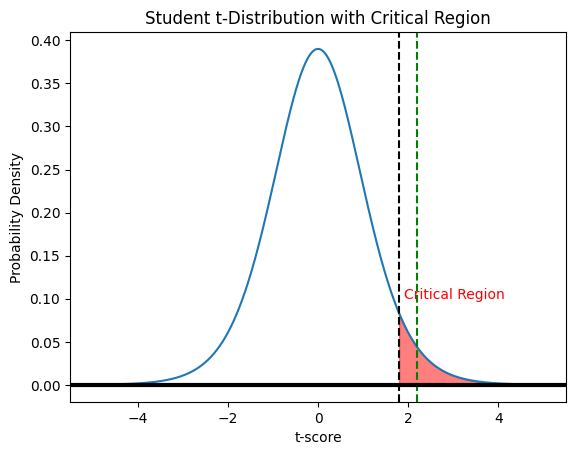

In [50]:
data  = df['Diff']
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_hypothesis_test(t_score,alpha,'upper',df)

## Question 23

In [51]:
path = 'C:\\Users\\kakut\\OneDrive\\Desktop\\ocr images\\'
image_file = f'{path}q23.jpg'
img = cv2.imread(image_file)

### Graying

In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(f"{path}\\temp\\index_gray.png", gray)

True

### Binary Thresholding

In [53]:
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite(f"{path}\\temp\\index_thresh.png", thresh)

True

### Dilating

In [54]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilated = cv2.dilate(thresh, kernel, iterations=5)
cv2.imwrite(f"{path}\\temp\\index_dilated.png", dilated)

True

### Erosion

In [55]:
eroded = cv2.erode(dilated, kernel, iterations=1)
cv2.imwrite(f"{path}\\temp\\index_eroded.png", eroded)

True

In [56]:
cnts = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
results  = []
rois = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = img[y:y+h, x:x+w]
        rois.append(roi)
        cv2.rectangle(img, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_result = pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)
cv2.imwrite(f"{path}\\temp\\index_bbox_new.png", img)

True

In [57]:
roi1_text = pytesseract.image_to_string(rois[0])
roi2_text = pytesseract.image_to_string(rois[1],config='--psm 6 -l eng')
roi3_text = pytesseract.image_to_string(rois[2],config='--psm 6 -l eng')
roi4_text = pytesseract.image_to_string(rois[3])
roi5_text = pytesseract.image_to_string(rois[4],config='--psm 6 -l eng')
roi6_text = pytesseract.image_to_string(rois[5],config='--psm 6 -l eng')


#Strings to exclude from the extracted text
exclude_strings =("Name","Before","After")

# Combine text from both ROIs and filter out specified strings
col1 = [i for i in roi1_text.split("\n") if i.strip() and i not in exclude_strings]
col2 = [i for i in roi2_text.split("\n") if i.strip() and i not in exclude_strings]
col3 = [i for i in roi3_text.split("\n") if i.strip() and i not in exclude_strings]
col4 = [i for i in roi4_text.split("\n") if i.strip() and i not in exclude_strings]
col5 = [i for i in roi5_text.split("\n") if i.strip() and i not in exclude_strings]
col6 = [i for i in roi6_text.split("\n") if i.strip() and i not in exclude_strings]


In [58]:
df = pd.DataFrame({
    'Name':col1+col4,
    'Before':col2+col5,
    'After':col3+col6
})
df['After'].loc[4] = 113
df['Before'].loc[9] = 125

# Convert 'Before' and 'After' columns to integers
df['Before'] = df['Before'].astype(int)
df['After'] = df['After'].astype(int)
df['Diff'] = df['After'] - df['Before']
df

,Name,Before,After,Diff
0,Evie Gorky,190,196,6
1,Bob Mack,250,240,-10
2,Lou Brandon,345,345,0
3,Karl Unger,210,212,2
4,Sue Koontz,114,113,-1
5,Pat O’Leary,126,129,3
6,Kim Dennis,186,189,3
7,Connie Kaye,116,115,-1
8,Tom Dama,196,194,-2
9,Maxine Sims,125,124,-1


In [59]:
data = df['Diff']


t-score: -0.07387728503667783
Critical Value: -2.8214379233005498
Fail to Reject Null Hypothesis (H0)


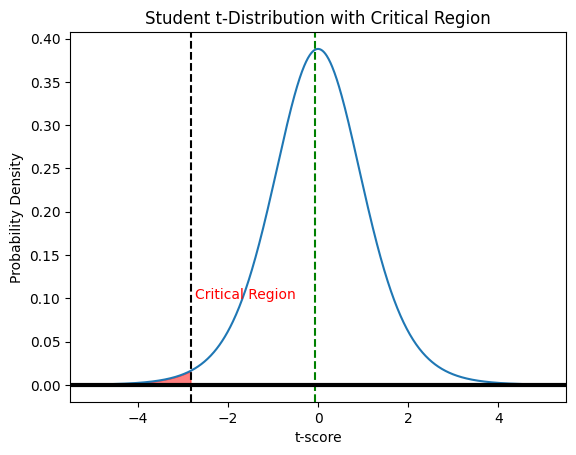

In [60]:
data  = df['Diff']
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.01

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_hypothesis_test(t_score,alpha,'lower',df)

## Question 24

t-score: -2.119071800026832
Critical Value: -2.9979515668685286
Fail to Reject Null Hypothesis (H0)


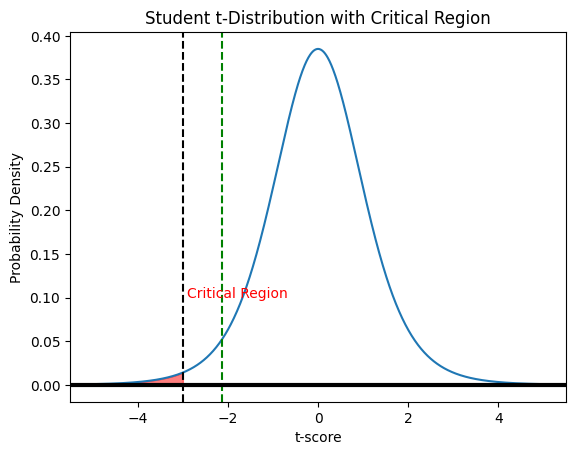

In [61]:

before = [14,7,4,5,17,12,8,9]
after = [2,7,3,6,8,13,3,5]
data  = [(i-j) for i,j in zip(after,before)]
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.01

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_hypothesis_test(t_score,alpha,'lower',df)

## Question 25

t-score: -2.605355789115719
Critical Value: -1.8945786050613054
Reject Null Hypothesis (H0)


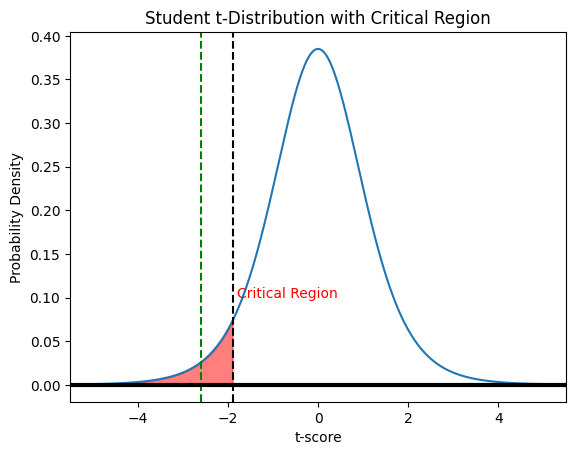

In [62]:
#Given
data = [88,82,81,87,80,78,79,89]

population_mean  = 87
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)


## Question 26

t-score: 1.4373989364401725
Critical Value: 2.8214379233005493
Fail to Reject Null Hypothesis (H0)


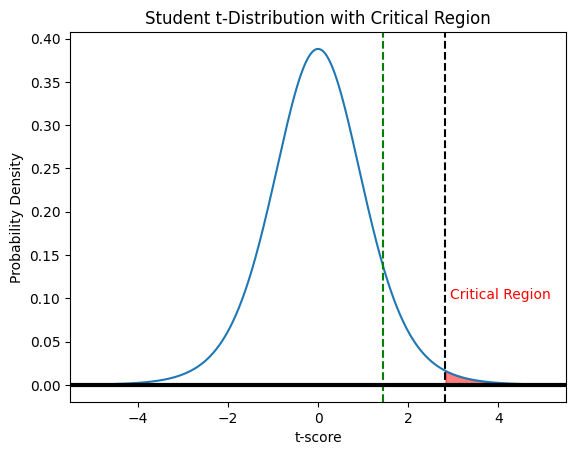

In [63]:
#Given
population_mean  = 235
sample_mean = 240
sample_std = 11
n=10
alpha = 0.01

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 27

t-score: 3.8971143170299736
Critical Value: 1.7958848187036691
Reject Null Hypothesis (H0)


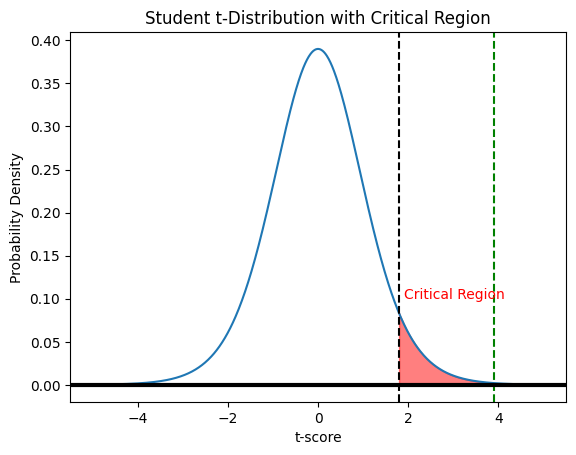

In [64]:
#Given
population_mean  = 42
sample_mean = 51
sample_std = 8
n=12
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 28

t-score: 2.950532471312294
Critical Value: 2.9979515668685277
Fail to Reject Null Hypothesis (H0)


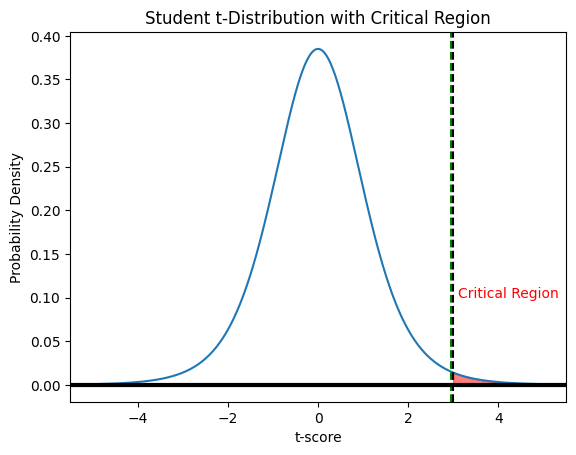

In [65]:
#Given
data = [10.1,9.3,9.2,10.2,9.3,9.6,9.4,8.8]

population_mean  = 9
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.01

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 29

t-score: -1.3975906494973698
Critical Value: (-2.200985160082949, 2.200985160082949)
Fail to Reject Null Hypothesis (H0)


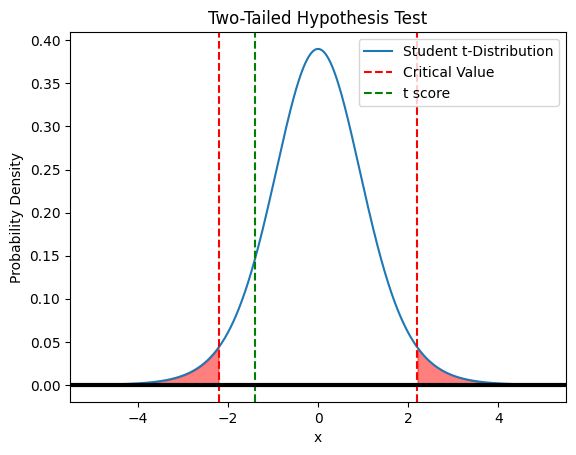

In [66]:
#Given
data = [1.75,1.96,1.57,1.82,1.85,1.82,2.43,2.65,2.6,2.24,1.69,2.66]

population_mean  = 2.25
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 30

t-score: 1.234268478034404
Critical Value: (-2.0595385527532946, 2.059538552753294)
Fail to Reject Null Hypothesis (H0)


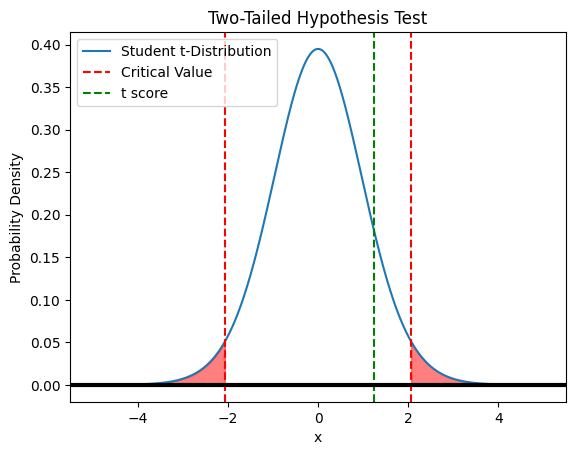

In [67]:
#Given

sample_mean1 = 17.6
sample_std1 = 2.6
sample_mean2 = 16.2
sample_std2 = 3.3

n1=15
n2=12
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 31

t-score: 4.282109728692299
Critical Value: 2.5669339837199097
Reject Null Hypothesis (H0)


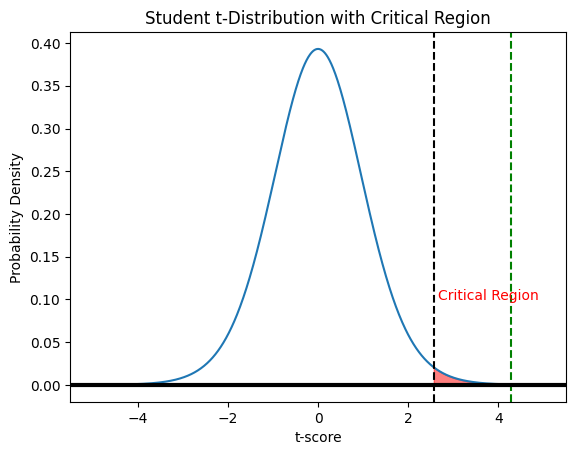

In [68]:
#Given
data1 = [10,10,11,15,7,11,10,9]
data2 = [4,8,7,7,4,5,1,7,4,10,5]

sample_mean1 = np.mean(data1)
sample_std1 = np.std(data1,ddof=1)
sample_mean2 = np.mean(data2)
sample_std2 = np.std(data2,ddof=1)

n1=len(data1)
n2=len(data2)
alpha = 0.01

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)

## Question 32

t-score: 3.35238056550611
Critical Value: 2.055529438642871
Reject Null Hypothesis (H0)


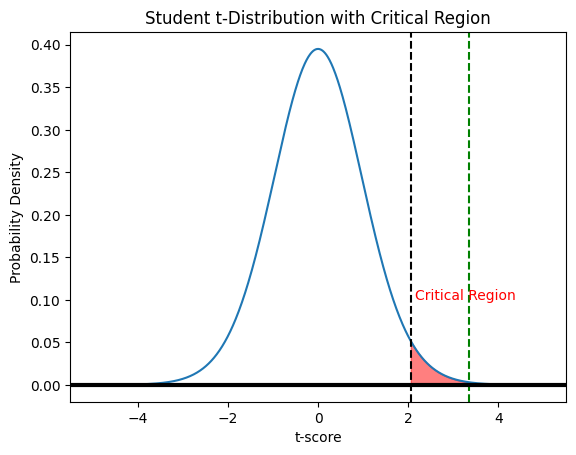

In [69]:
#Given

sample_mean1 = 12.92
sample_std1 = 0.25
sample_mean2 = 12.63
sample_std2 = 0.2

n1=15
n2=13
alpha = 0.025

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_hypothesis_test(t_score,alpha,'upper',df)

## Question 33

t-score: -3.079962014036072
Critical Value: (-2.5279770027405464, 2.527977002740546)
Reject Null Hypothesis (H0)


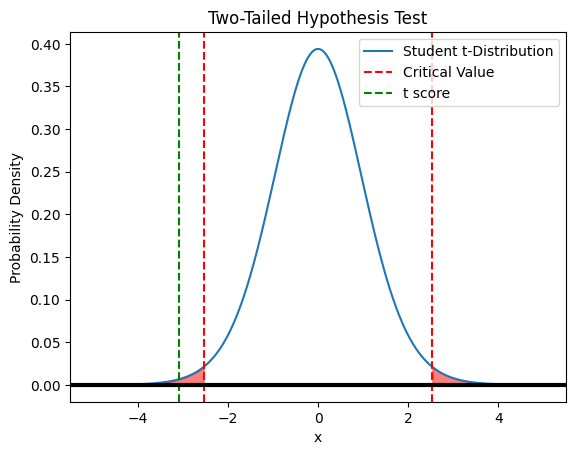

In [71]:
#Given
data1 = [160,158,162,161,160,160,161,159,159,160]
data2 = [163,161,160,162,163,162,164,163,165,162,159,160]

sample_mean1 = np.mean(data1)
sample_std1 = np.std(data1,ddof=1)
sample_mean2 = np.mean(data2)
sample_std2 = np.std(data2,ddof=1)

n1=len(data1)
n2=len(data2)
alpha = 0.02

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 34

t-score: -0.05613340903977604
Critical Value: (-2.200985160082949, 2.200985160082949)
Fail to Reject Null Hypothesis (H0)


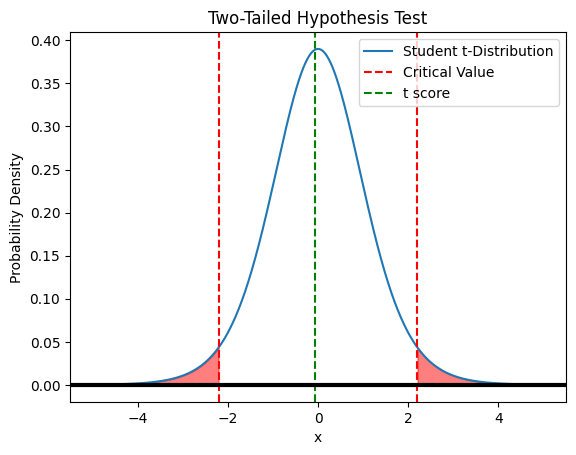

In [73]:
#Given
l = [1240,1137,942,1105,846,1216,1190,840,892,1115,1260,550]
r = [1248,1130,940,1105,849,1221,1180,841,890,1120,1257,551]
data = [i-j for i,j in zip(r,l)]

sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

## Question 35

t-score: -2.41522945769824
Critical Value: -2.9979515668685286
Fail to Reject Null Hypothesis (H0)


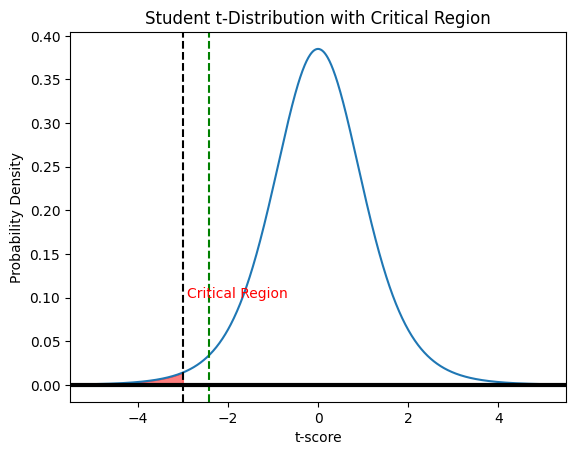

In [75]:
#Given
before = [5,7,6,4,8,9,8,10]
after = [3,7,7,0,4,6,8,2]
data = [i-j for i,j in zip(after,before)]

sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.01

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_hypothesis_test(t_score,alpha,'lower',df)

## Question 36

t-score: 0.6994655622764725
Critical Value: 1.7247182429207857
Fail to Reject Null Hypothesis (H0)


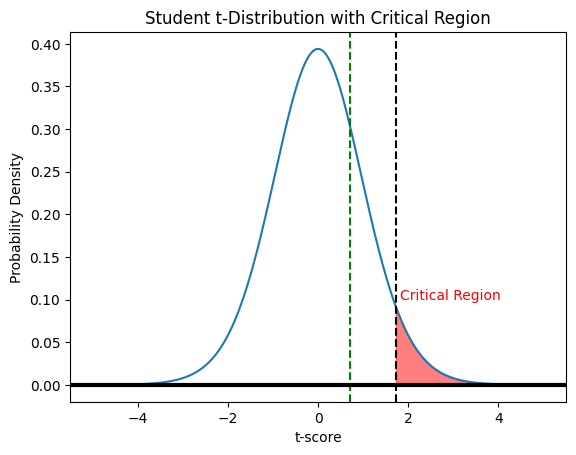

In [79]:
#Given
weekend = [18.88,24.33,27.26,35.79,42.31,53.77,62.94,73.59,76.51,88.09]
weekday = [21.54,34.76,45.78,46.87,56.78,66.04,68.45,70.98,72.67,76.89,81.65,85.61,91.87,94.71,95.8]

sample_mean1 = np.mean(weekday)-10
sample_std1 = np.std(weekday,ddof=1)
sample_mean2 = np.mean(weekend)
sample_std2 = np.std(weekend,ddof=1)

n1=len(data1)
n2=len(data2)
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)

## Question 37

t-score: -4.013691347927694
Critical Value: -2.5834871852674723
Reject Null Hypothesis (H0)


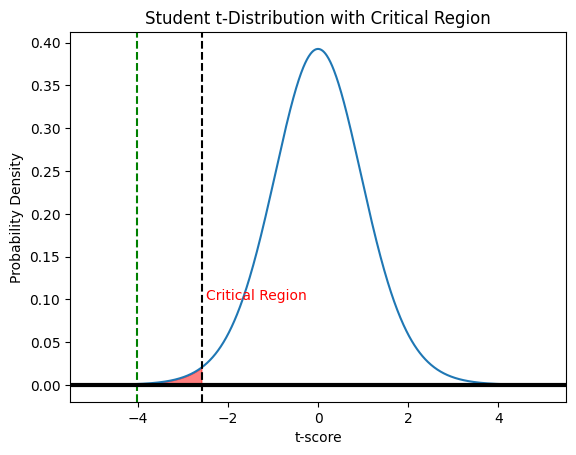

In [82]:
#Given
data = [2.98,2.4,2.7,2.25,3.23,3.17,2.93,3.18,2.8,2.38,3.75,3.2,3.27,2.52,2.58,4.45,2.45]

population_mean  = 3.5
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.01

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)


## Question 38

t-score: 0.987825209601428
Critical Value: 1.7613101357748562
Fail to Reject Null Hypothesis (H0)


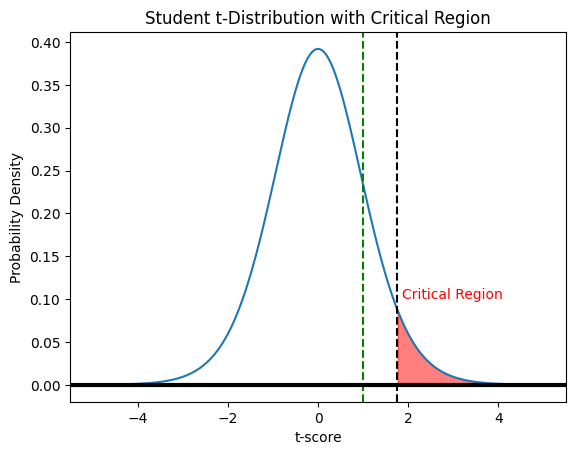

In [84]:
#Given
data = [5,21,17,0,10,4,8,34,11,28,4,8,7,14,15]

population_mean  = 10
sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='upper',df=df)


## Question 39

t-score: -3.2
Critical Value: -1.7530503556925552
Reject Null Hypothesis (H0)


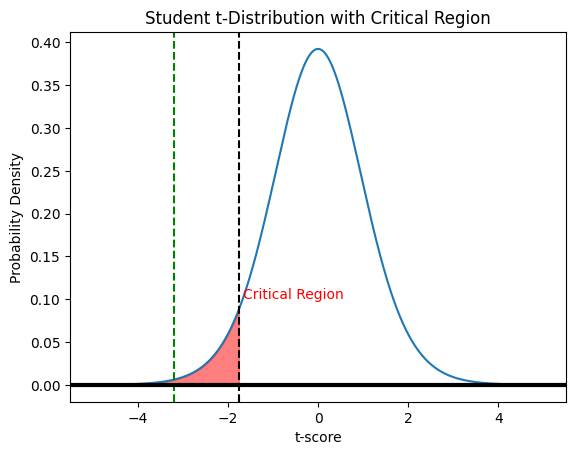

In [85]:
#Given
population_mean  = 20
sample_mean = 18
sample_std = 2.5
n=16
alpha = 0.05

df=n-1
t_score = calculate_t_score(sample_mean,population_mean,sample_std,n)
perform_hypothesis_test(t_score,alpha,tail='lower',df=df)


t-score: 0.09926135178975279
Critical Value: (-2.262157162740992, 2.2621571627409915)
Fail to Reject Null Hypothesis (H0)


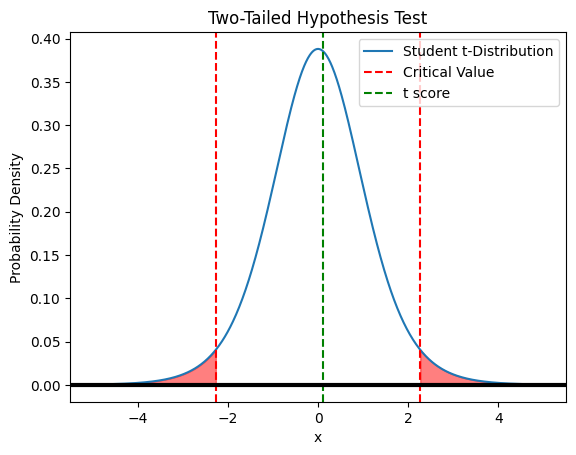

In [86]:
#Given
sol_A = [100,86,82,70,82,77,80,99,86,91]
sol_B = [91,86,94,65,91,86,60,98,89,90]
data = [i-j for i,j in zip(sol_A,sol_B)]

sample_mean = np.mean(data)
sample_std = np.std(data,ddof=1)
n=len(data)
alpha = 0.05

df=n-1
t_score = (sample_mean)/(sample_std/n**0.5)
perform_two_tailed_hypothesis_test(alpha,t_score,df)

t-score: 2.153009871091334
Critical Value: (-2.200985160082949, 2.200985160082949)
Fail to Reject Null Hypothesis (H0)


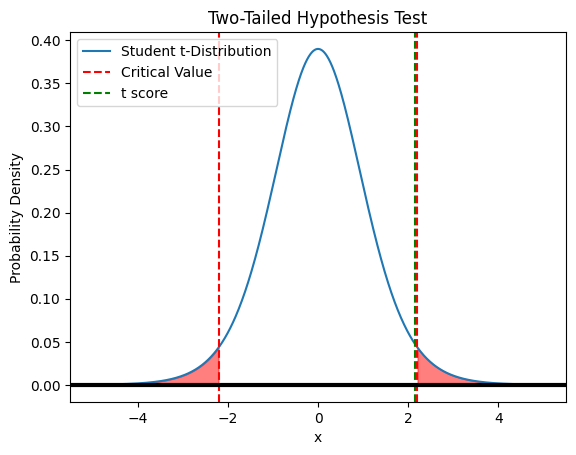

In [88]:
#Given

sample_mean1 = 12
sample_std1 = 2
sample_mean2 = 9
sample_std2 = 3

n1=7
n2=6
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_two_tailed_hypothesis_test(alpha,t_score,df)